In [37]:
# Import the packages we will use in this project
# For mathematical computation
import pandas as pd
import numpy as np
import os # accessing directory structure

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\pious\Downloads\cleandatafinal.csv')

In [38]:
# Now let's take a look at the data

df

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power
0,Tata,Nano Genx,Xe,236447,624,2,2,RWD,In-line,BS IV,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,93.538462
1,Bajaj,Qute (Re60),Qcar,263000,216,4,1,RWD,In-line,BS IV,...,Petrol,Hatchback,4,35.00,5,165.0,4,Manual,2,85.319750
2,Tata,Nano Genx,Xm,272223,624,2,2,RWD,In-line,BS IV,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,84.210526
3,Datsun,Redi-Go,D,279650,799,3,4,FWD,In-line,BS IV,...,Petrol,Hatchback,5,25.17,5,185.0,5,Manual,2,35.750000
4,Maruti Suzuki,Omni,5,282778,796,3,2,RWD,In-line,BS IV,...,Petrol,MPV,5,16.80,4,165.0,5,Manual,2,35.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Rolls-Royce,Phantom Coupe,6.8,77312661,6749,12,4,RWD,V,BS IV,...,Petrol,Coupe,2,22.80,8,164.0,4,Automatic,5,33.681956
1272,Rolls-Royce,Drophead Coupe,Phantom,83755383,6749,12,4,RWD,V,BS IV,...,Petrol,Convertible,2,9.80,8,164.0,4,Automatic,5,33.708353
1273,Rolls-Royce,Phantom,Sedan,95000000,6749,12,4,RWD,V,BS IV,...,Petrol,Sedan,4,23.00,8,164.0,5,Automatic,5,42.857143
1274,Bugatti,Chiron,W16,192142937,7993,16,4,RWD,W,BS VI,...,Petrol,Sports,2,5.95,7,165.0,2,Automatic,5,31.578947


In [39]:
df.describe()

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Doors,ARAI_Certified_Mileage,Ground_Clearance,Seating_Capacity,Airbags,Power
count,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,4.596538e+06,1852.580721,4.361285,3.979624,51.734248,4.551724,20.194655,176.300157,5.268809,3.223354,33.734770
std,1.214735e+07,1060.065281,1.619598,0.799740,16.088239,0.747065,40.908281,29.752265,1.142683,1.986098,43.151320
min,2.364470e+05,72.000000,2.000000,1.000000,15.000000,2.000000,3.400000,100.000000,2.000000,1.000000,1.160355
25%,7.438760e+05,1198.000000,4.000000,4.000000,41.000000,4.000000,16.000000,165.000000,5.000000,2.000000,17.166667
50%,1.060064e+06,1497.000000,4.000000,4.000000,45.000000,5.000000,19.000000,165.000000,5.000000,2.000000,25.000000
75%,2.979828e+06,1998.000000,4.000000,4.000000,60.000000,5.000000,23.000000,188.000000,5.000000,5.000000,39.661429
max,2.121554e+08,7993.000000,16.000000,16.000000,105.000000,5.000000,1449.000000,498.000000,16.000000,10.000000,1000.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1276 non-null   object 
 1   Model                   1276 non-null   object 
 2   Variant                 1276 non-null   object 
 3   Ex-Showroom_Price       1276 non-null   int64  
 4   Displacement            1276 non-null   int64  
 5   Cylinders               1276 non-null   int64  
 6   Valves_Per_Cylinder     1276 non-null   int64  
 7   Drivetrain              1276 non-null   object 
 8   Cylinder_Configuration  1276 non-null   object 
 9   Emission_Norm           1276 non-null   object 
 10  Fuel_Tank_Capacity      1276 non-null   float64
 11  Fuel_Type               1276 non-null   object 
 12  Body_Type               1276 non-null   object 
 13  Doors                   1276 non-null   int64  
 14  ARAI_Certified_Mileage  1276 non-null   

In [41]:
# Data Types for our columns

print(df.dtypes)

Make                       object
Model                      object
Variant                    object
Ex-Showroom_Price           int64
Displacement                int64
Cylinders                   int64
Valves_Per_Cylinder         int64
Drivetrain                 object
Cylinder_Configuration     object
Emission_Norm              object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Body_Type                  object
Doors                       int64
ARAI_Certified_Mileage    float64
Gears                      object
Ground_Clearance          float64
Seating_Capacity            int64
Type                       object
Airbags                     int64
Power                     float64
dtype: object


In [42]:
# Find missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Make - 0%
Model - 0%
Variant - 0%
Ex-Showroom_Price - 0%
Displacement - 0%
Cylinders - 0%
Valves_Per_Cylinder - 0%
Drivetrain - 0%
Cylinder_Configuration - 0%
Emission_Norm - 0%
Fuel_Tank_Capacity - 0%
Fuel_Type - 0%
Body_Type - 0%
Doors - 0%
ARAI_Certified_Mileage - 0%
Gears - 0%
Ground_Clearance - 0%
Seating_Capacity - 0%
Type - 0%
Airbags - 0%
Power - 0%


In [43]:
# Duplicate data
df.drop_duplicates()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power
0,Tata,Nano Genx,Xe,236447,624,2,2,RWD,In-line,BS IV,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,93.538462
1,Bajaj,Qute (Re60),Qcar,263000,216,4,1,RWD,In-line,BS IV,...,Petrol,Hatchback,4,35.00,5,165.0,4,Manual,2,85.319750
2,Tata,Nano Genx,Xm,272223,624,2,2,RWD,In-line,BS IV,...,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,84.210526
3,Datsun,Redi-Go,D,279650,799,3,4,FWD,In-line,BS IV,...,Petrol,Hatchback,5,25.17,5,185.0,5,Manual,2,35.750000
4,Maruti Suzuki,Omni,5,282778,796,3,2,RWD,In-line,BS IV,...,Petrol,MPV,5,16.80,4,165.0,5,Manual,2,35.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Rolls-Royce,Phantom Coupe,6.8,77312661,6749,12,4,RWD,V,BS IV,...,Petrol,Coupe,2,22.80,8,164.0,4,Automatic,5,33.681956
1272,Rolls-Royce,Drophead Coupe,Phantom,83755383,6749,12,4,RWD,V,BS IV,...,Petrol,Convertible,2,9.80,8,164.0,4,Automatic,5,33.708353
1273,Rolls-Royce,Phantom,Sedan,95000000,6749,12,4,RWD,V,BS IV,...,Petrol,Sedan,4,23.00,8,164.0,5,Automatic,5,42.857143
1274,Bugatti,Chiron,W16,192142937,7993,16,4,RWD,W,BS VI,...,Petrol,Sports,2,5.95,7,165.0,2,Automatic,5,31.578947


<AxesSubplot:>

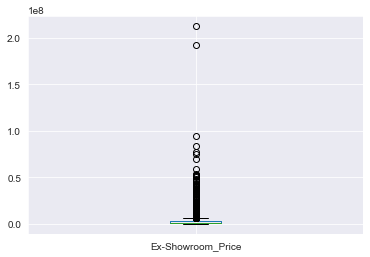

In [44]:
# Are there any Outliers?

df.boxplot(column=['Ex-Showroom_Price'])

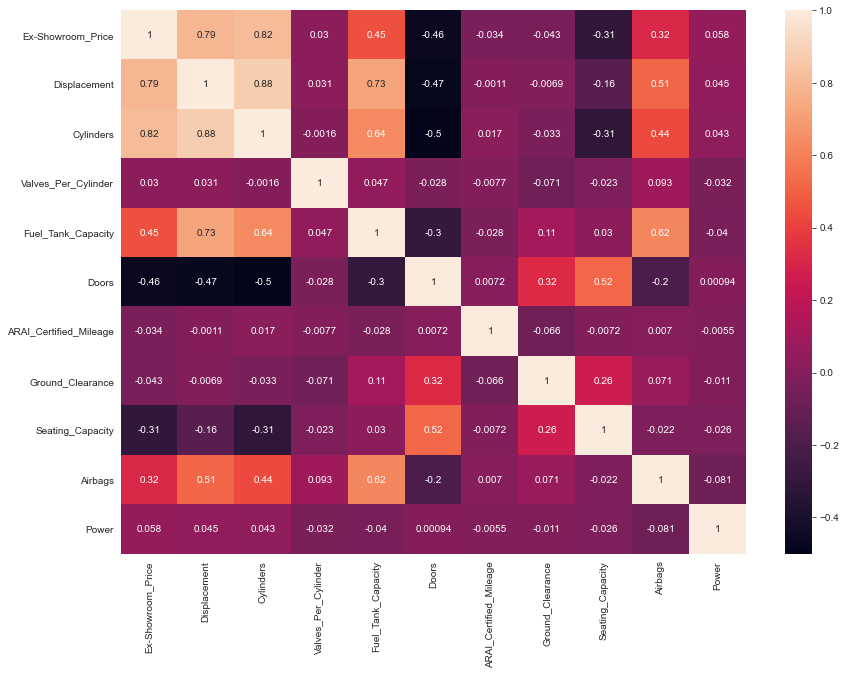

In [45]:
correlation_matrix = df.corr()
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [46]:
# Top 10 companies by gross ex-showroom price

MakePriceSum = df.groupby('Make')[["Ex-Showroom_Price"]].sum()
MakePriceSumSorted = MakePriceSum.sort_values('Ex-Showroom_Price', ascending = False)[:10]
MakePriceSumSorted = MakePriceSumSorted['Ex-Showroom_Price'].astype('int64') 
MakePriceSumSorted

Make
Rolls-Royce         610167011
Mercedes-Benz       540307648
Lamborghini         507700950
Land Rover Rover    444324575
Bugatti             404298334
Ferrari             342979965
Bmw                 305480000
Bentley             243395126
Jaguar              230219067
Audi                224453350
Name: Ex-Showroom_Price, dtype: int64

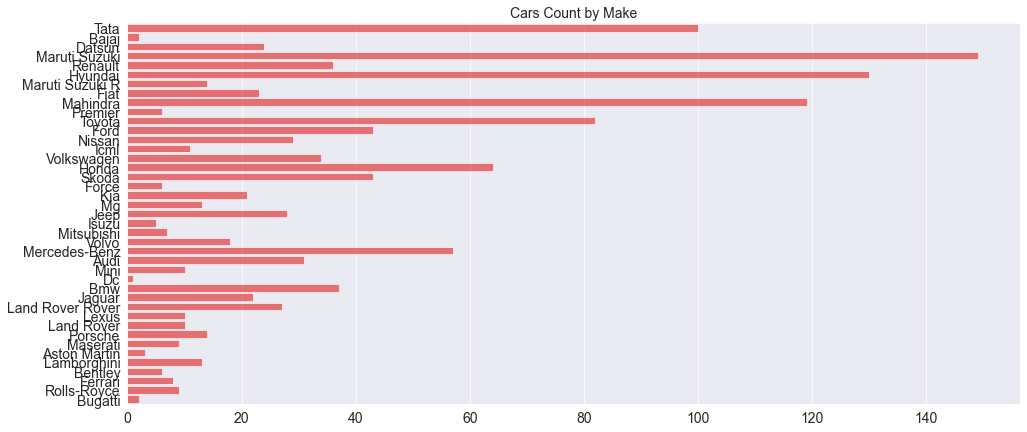

In [47]:
# Cars Count by Make

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Make',alpha=.6,color='Red')
plt.title('Cars Count by Make',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

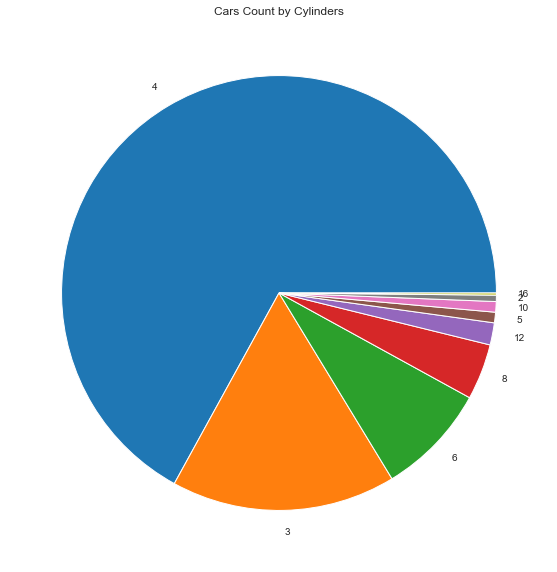

In [48]:
# Cars Count by Cylinders

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Cylinders.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Cylinders")
plt.show()

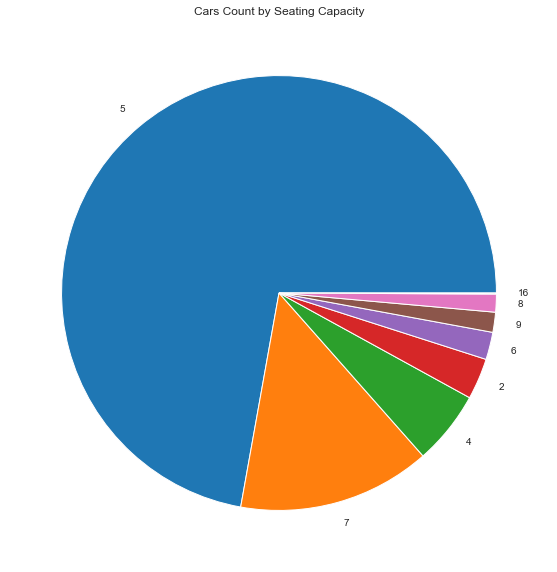

In [51]:
# Cars Count by Seating_Capacity

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Seating_Capacity.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Seating Capacity")
plt.show()

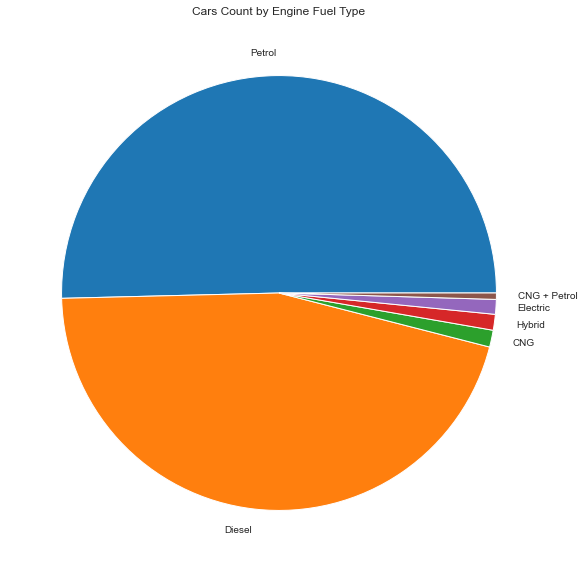

In [52]:
# Cars Count by Engine Fuel Type

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

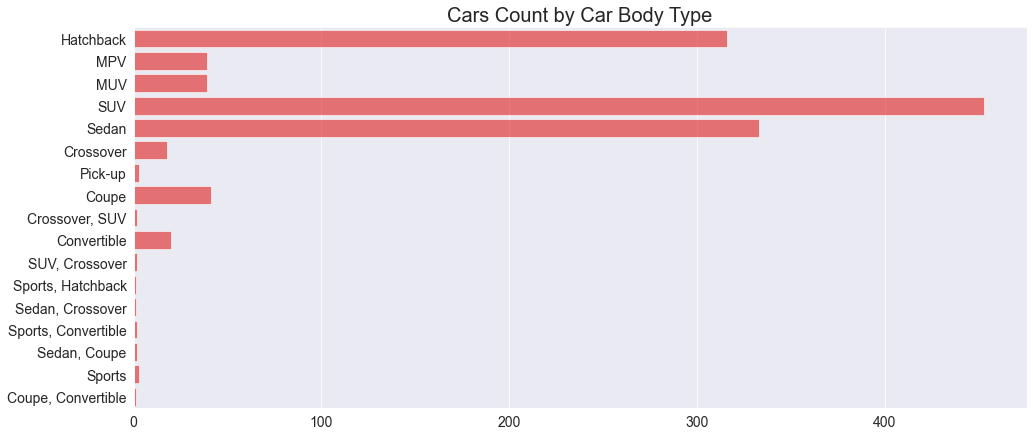

In [53]:
# Cars Count by Car Body Type

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='Red')
plt.title('Cars Count by Car Body Type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

In [54]:
# SUV's Sedans and hatchbacks seems to be the dominating car types

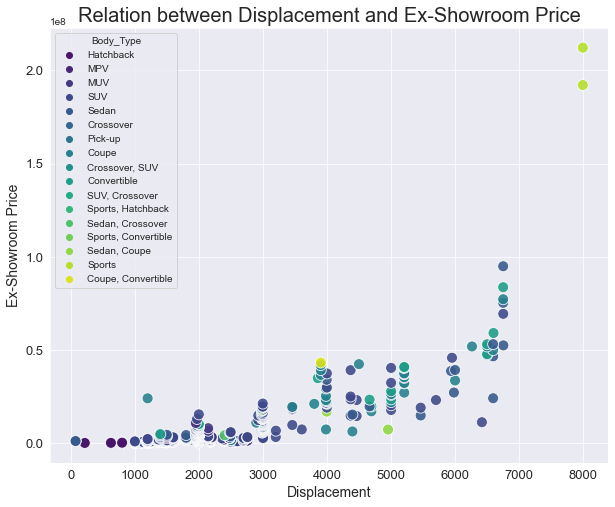

In [55]:
# Relationship between Displacement and price

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Displacement',fontsize=14)
plt.ylabel('Ex-Showroom Price',fontsize=14)
plt.title('Relation between Displacement and Ex-Showroom Price',fontsize=20);

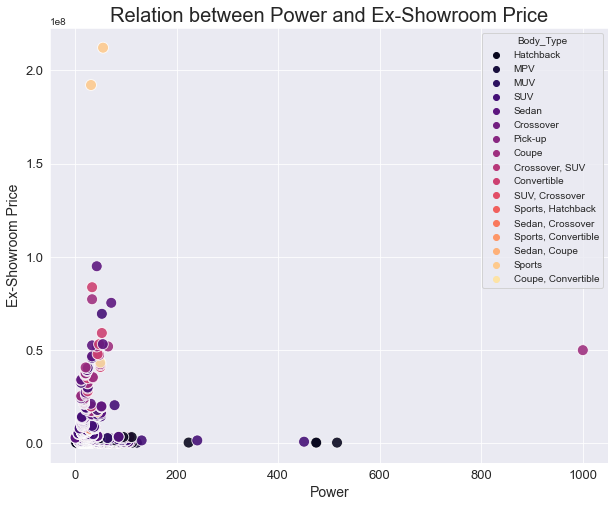

In [56]:
# Relationship between power and price

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type',palette='magma',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=14)
plt.ylabel('Ex-Showroom Price',fontsize=14)
plt.title('Relation between Power and Ex-Showroom Price',fontsize=20);

In [57]:
# Horsepower of car is related to car price  
# Hatchbacks are the body type with the least horsepower and price

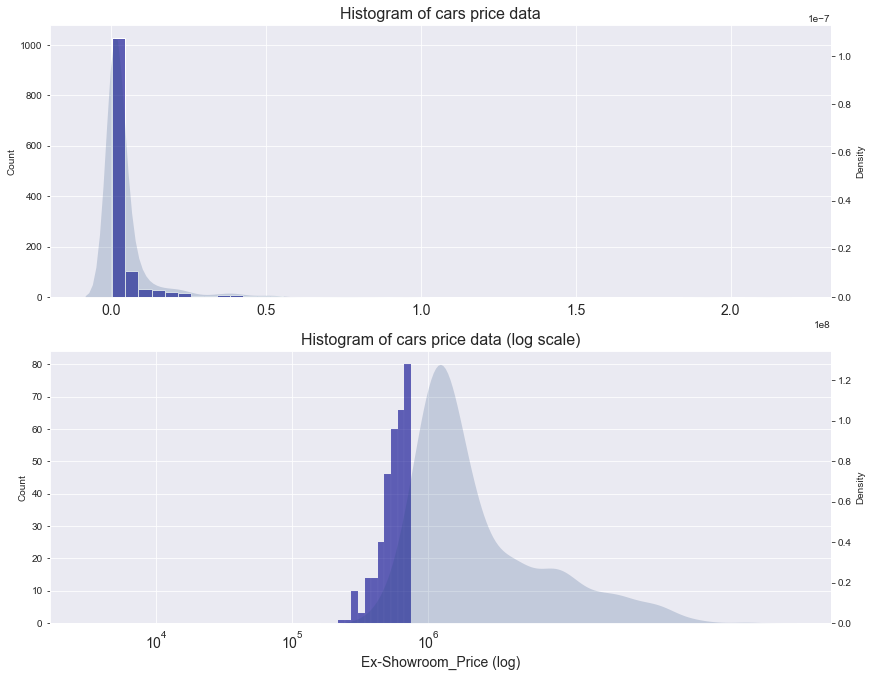

In [58]:
# Checking Ex-Showroom Price distribution using normal and log scales due to the huge difference in prices

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='Ex-Showroom_Price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='Ex-Showroom_Price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Ex-Showroom_Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

In [59]:
# Variance in price can be checked by plotting a box plot

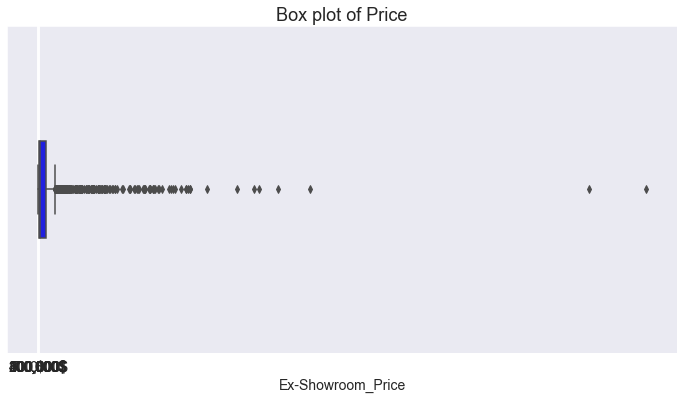

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price',width=.3,color='blue', hue= 'Fuel_Type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('Ex-Showroom_Price',fontsize=14);

In [61]:
# Outliers form a very different type(s) of cars or there are very different categories in the automotive market

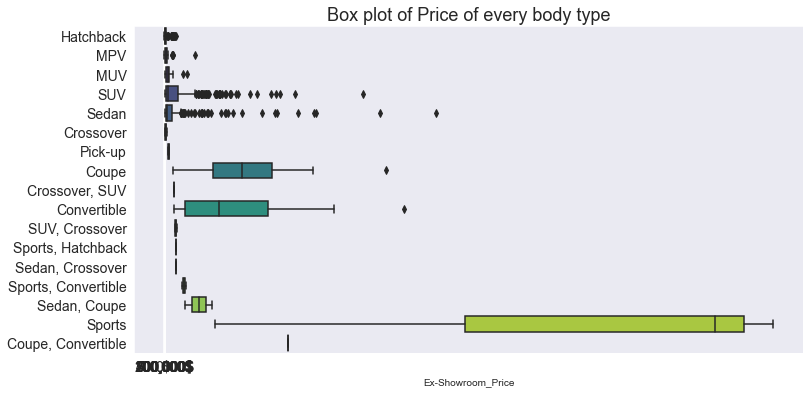

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price', y='Body_Type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

In [63]:
# Car body type affects the price

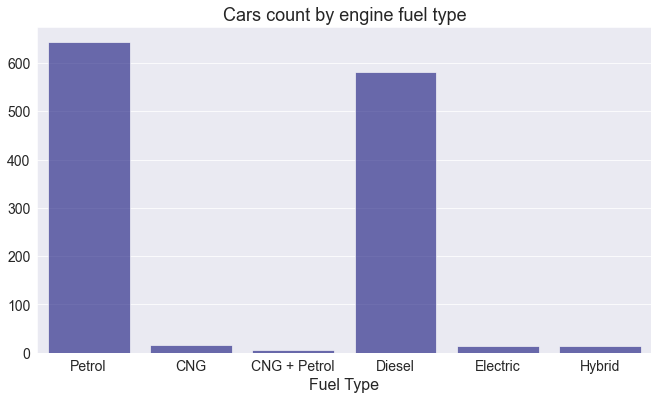

In [64]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='Fuel_Type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

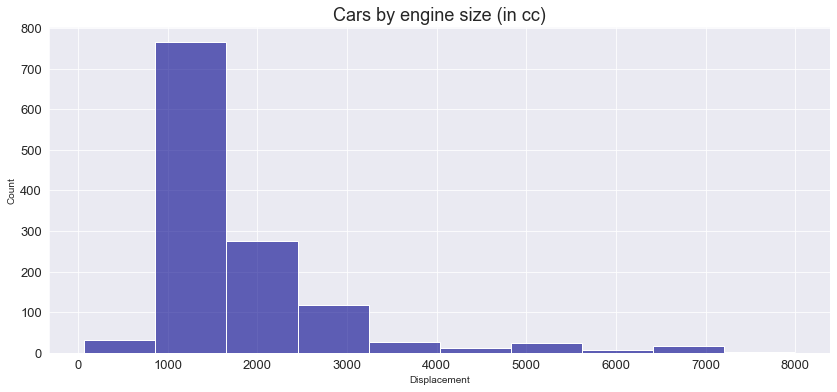

In [65]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in cc)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

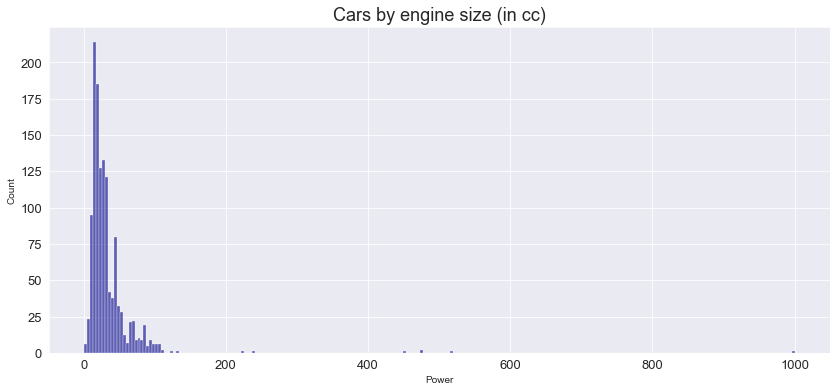

In [66]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in cc)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

In [11]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [37]:
df = pd.read_csv("C:/Users/aulee/OneDrive/Documents/cleanedagain6.csv")

In [23]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

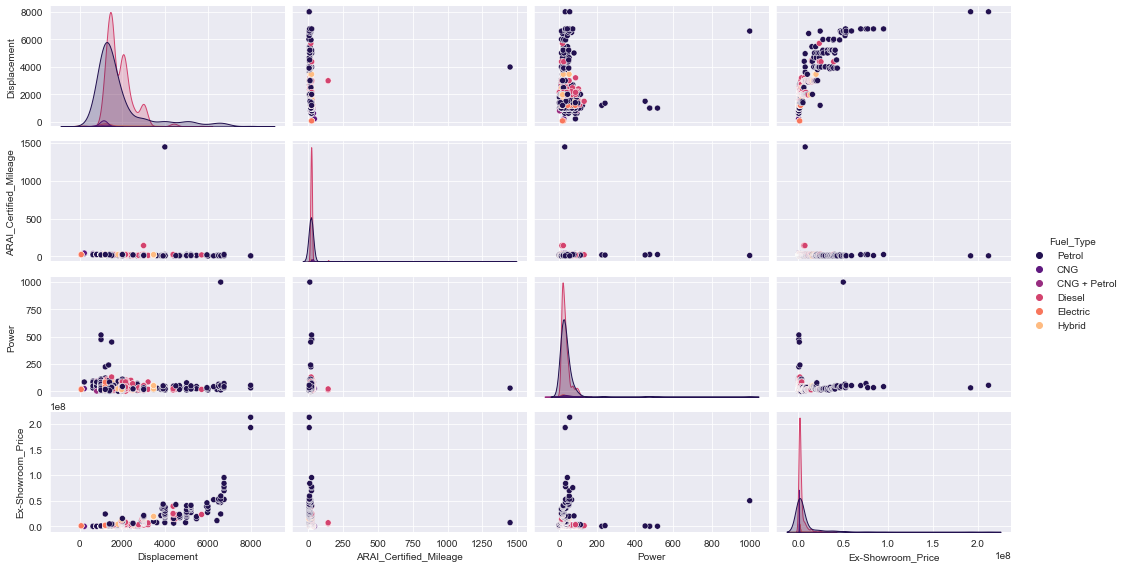

In [24]:
sns.pairplot(df,vars=[ 'Displacement', 'ARAI_Certified_Mileage', 'Power', 'Ex-Showroom_Price'], hue= 'Fuel_Type',
             palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

In [26]:
fig = px.scatter_3d(df, x='Power', z='Ex-Showroom_Price', y='ARAI_Certified_Mileage',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

In [38]:
df

,Unnamed: 0,Serial_Number,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power
0,0,1,Tata,Nano Genx,Xe,236447,624,2,2,RWD,In-line,BS IV,24.0,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,93.54
1,1,357,Bajaj,Qute (Re60),Qcar,263000,216,4,1,RWD,In-line,BS IV,45.0,Petrol,Hatchback,4,35.00,5,165.0,4,Manual,2,85.32
2,2,4,Tata,Nano Genx,Xm,272223,624,2,2,RWD,In-line,BS IV,24.0,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,84.21
3,3,6,Datsun,Redi-Go,D,279650,799,3,4,FWD,In-line,BS IV,28.0,Petrol,Hatchback,5,25.17,5,185.0,5,Manual,2,35.75
4,4,881,Maruti Suzuki,Omni,5,282778,796,3,2,RWD,In-line,BS IV,35.0,Petrol,MPV,5,16.80,4,165.0,5,Manual,2,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,354,Rolls-Royce,Phantom Coupe,6.8,77312661,6749,12,4,RWD,V,BS IV,100.0,Petrol,Coupe,2,22.80,8,164.0,4,Automatic,5,33.68
1272,1272,880,Rolls-Royce,Drophead Coupe,Phantom,83755383,6749,12,4,RWD,V,BS IV,100.0,Petrol,Convertible,2,9.80,8,164.0,4,Automatic,5,33.71
1273,1273,1219,Rolls-Royce,Phantom,Sedan,95000000,6749,12,4,RWD,V,BS IV,100.0,Petrol,Sedan,4,23.00,8,164.0,5,Automatic,5,42.86
1274,1274,355,Bugatti,Chiron,W16,192142937,7993,16,4,RWD,W,BS VI,45.0,Petrol,Sports,2,5.95,7,165.0,2,Automatic,5,31.58


In [39]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

In [40]:
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

,Unnamed: 0,Serial_Number,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power,cluster
493,493,924,Nissan,Sunny,Xl Diesel,912534,1461,4,4,FWD,In-line,BS IV,41.0,Diesel,Sedan,4,22.71,5,165.0,5,Manual,1,44.55,2
1122,1122,296,Bmw,X5,Xdrive30D Xline,8290000,2993,6,4,AWD,In-line,BS IV,45.0,Diesel,SUV,5,13.38,8,165.0,5,Automatic,6,37.50,8
702,702,963,Renault,Captur,Platine Petrol Dual Tone,1199999,1498,4,4,FWD,In-line,BS IV,50.0,Petrol,SUV,5,13.86,5,201.0,5,Manual,2,12.18,2
847,847,679,Mahindra,Xuv500,W9 At,1710118,2179,4,4,FWD,In-line,BS IV,70.0,Diesel,SUV,5,16.00,6,200.0,7,Automatic,2,45.09,2
1224,1224,320,Bmw,7-Series,M760Li Xdrive,24250000,6592,12,4,AWD,V,BS VI,78.0,Petrol,Sedan,4,7.96,8,152.0,4,Automatic,7,12.26,6


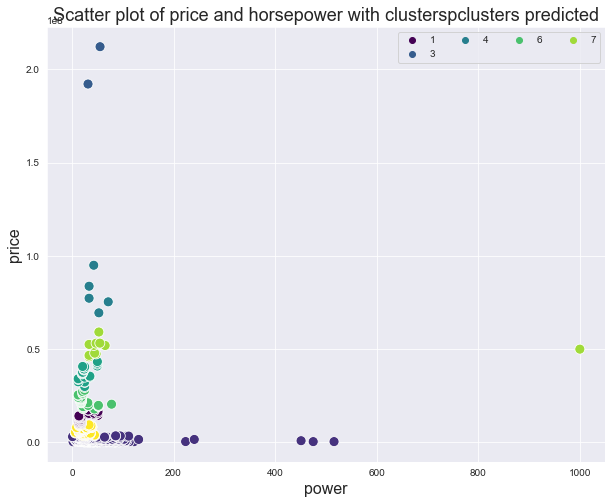

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Ex-Showroom_Price', x='Power',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

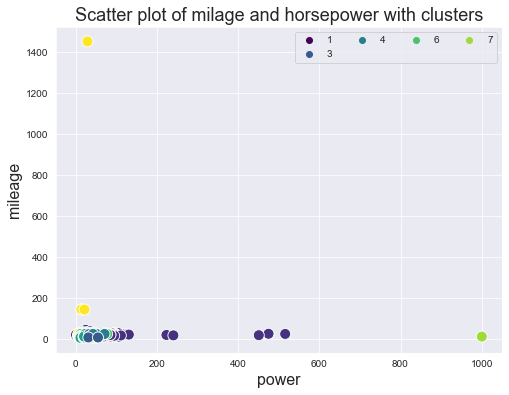

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Power', y='ARAI_Certified_Mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);

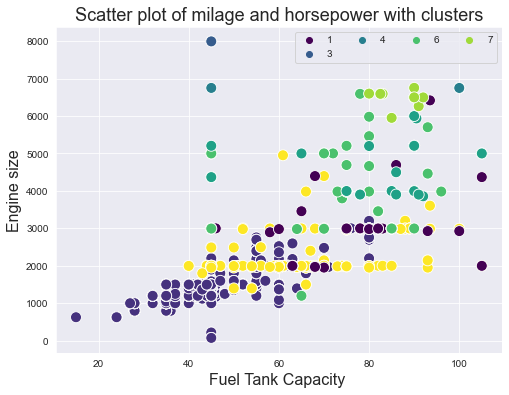

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Fuel_Tank_Capacity', y='Displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

In [51]:
fig = px.scatter_3d(df, x='Power', z='Ex-Showroom_Price', y='ARAI_Certified_Mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()

In [52]:
PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

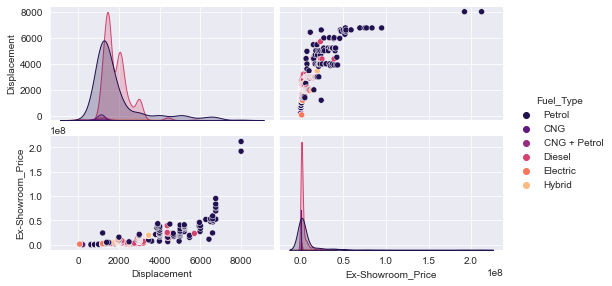

In [54]:
sns.pairplot(df,vars=[ 'Displacement', 'Ex-Showroom_Price'], hue= 'Fuel_Type', palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

In [55]:
fig = px.scatter_3d(df, x='Displacement', z='Ex-Showroom_Price', y='Fuel_Type',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();